In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('football_player.csv')
df

,player_id,player_position,team,goals_last_5,assists_last_5,minutes_last_5,shots_on_target,pass_accuracy,fitness_score,opponent_strength,home_away,weather,next_match_goals,performance_level
0,1,Defender,Team_C,3,3,410.679559,2,58.042888,73.672905,1,Home,Cloudy,0.855258,Medium
1,2,Goalkeeper,Team_G,4,3,326.797666,20,83.249291,69.453060,3,Away,Rainy,2.654040,High
2,3,Forward,Team_G,3,2,315.744307,4,67.875585,94.707961,4,Away,Snowy,0.561495,Low
3,4,Defender,Team_G,5,0,320.458465,6,78.605756,52.595024,5,Home,Rainy,0.441120,Low
4,5,Defender,Team_D,2,0,472.722967,8,NaN,57.805283,2,Away,Cloudy,1.826211,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Forward,Team_E,1,3,289.851567,6,61.457830,82.601300,5,Away,Rainy,0.279992,Low
4996,4997,Midfielder,Team_F,2,0,389.301647,9,96.049437,76.643801,5,Away,Sunny,0.821687,Medium
4997,4998,Defender,Team_D,5,2,407.167168,8,NaN,73.804479,1,Away,Sunny,1.875707,High
4998,4999,Midfielder,Team_D,2,6,344.806218,3,79.826153,64.900257,5,Home,Rainy,0.551946,Low


In [2]:
df.dtypes

player_id              int64
player_position       object
team                  object
goals_last_5           int64
assists_last_5         int64
minutes_last_5       float64
shots_on_target        int64
pass_accuracy        float64
fitness_score        float64
opponent_strength      int64
home_away             object
weather               object
next_match_goals     float64
performance_level     object
dtype: object

Text(0.5, 1.0, 'Player Postion vs Count')

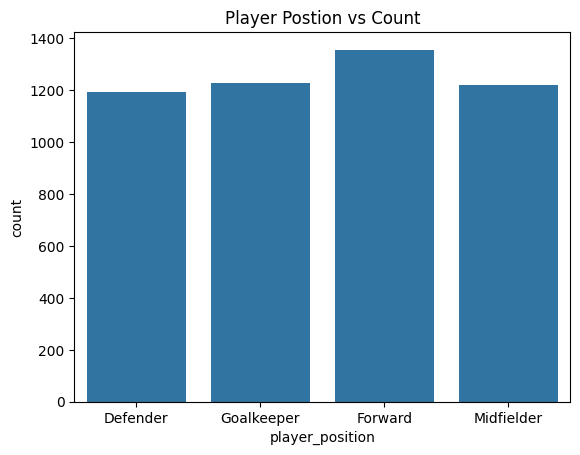

In [51]:
sns.countplot(x=df['player_position'])
plt.title('Player Postion vs Count')

Text(0.5, 1.0, 'Team vs Count')

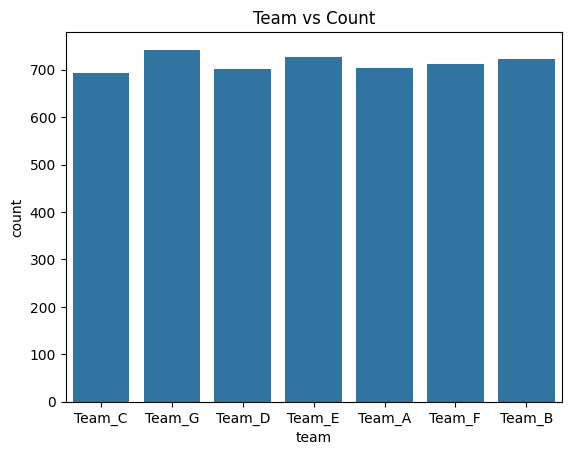

In [52]:
sns.countplot(x=df['team'])
plt.title('Team vs Count')

Text(0.5, 1.0, 'Home/Away Count')

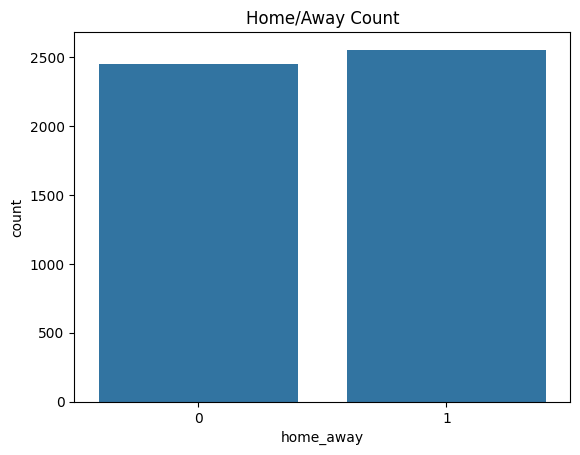

In [53]:
sns.countplot(x=df['home_away'])
plt.title('Home/Away Count')


Text(0.5, 1.0, 'Player Position vs Count')

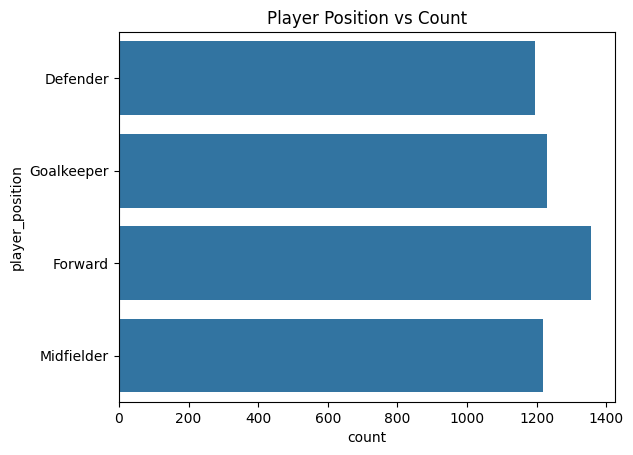

In [54]:
sns.countplot(df['player_position'])
plt.title('Player Position vs Count')

Text(0.5, 1.0, 'Weather vs Count')

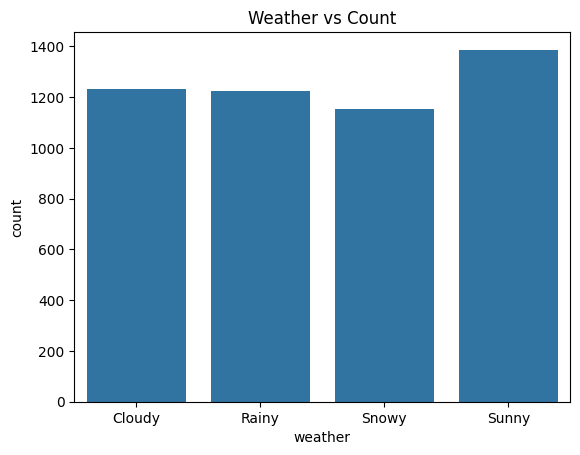

In [56]:
sns.countplot(x=df['weather'])
plt.title('Weather vs Count')

In [3]:
df.isna().sum()

player_id              0
player_position       80
team                   0
goals_last_5           0
assists_last_5         0
minutes_last_5       150
shots_on_target        0
pass_accuracy        150
fitness_score        150
opponent_strength      0
home_away              0
weather               80
next_match_goals       0
performance_level      0
dtype: int64

In [4]:
df['performance_level'].value_counts()

performance_level
Medium    2441
Low       2179
High       380
Name: count, dtype: int64

In [5]:
lst=['player_position','minutes_last_5','pass_accuracy','fitness_score','weather']
for i in lst:
    print(i,'\n',df[i].unique())

player_position 
 ['Defender' 'Goalkeeper' 'Forward' 'Midfielder' nan]
minutes_last_5 
 [410.67955915 326.79766564 315.74430687 ... 407.16716802 344.80621781
 337.58352966]
pass_accuracy 
 [58.04288753 83.24929069 67.87558544 ... 96.04943698 79.82615335
 70.98992391]
fitness_score 
 [73.67290524 69.45306021 94.70796068 ... 73.8044787  64.90025704
 92.62206413]
weather 
 ['Cloudy' 'Rainy' 'Snowy' 'Sunny' nan]


In [6]:
df['player_position'].fillna(df['player_position'].mode()[0],inplace=True)
df['minutes_last_5'].fillna(df['minutes_last_5'].mean(),inplace=True)
df['fitness_score'].fillna(df['fitness_score'].mean(),inplace=True)
df['pass_accuracy'].fillna(df['pass_accuracy'].mean(),inplace=True)
df['weather'].fillna(df['weather'].mode()[0],inplace=True)

C:\Users\abhin\AppData\Local\Temp\ipykernel_12012\1776079277.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['player_position'].fillna(df['player_position'].mode()[0],inplace=True)
C:\Users\abhin\AppData\Local\Temp\ipykernel_12012\1776079277.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

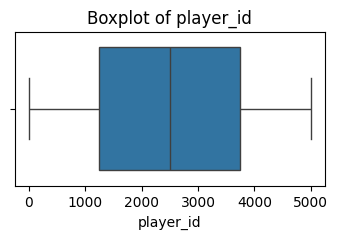

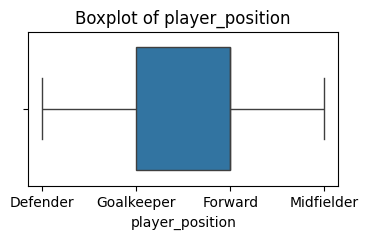

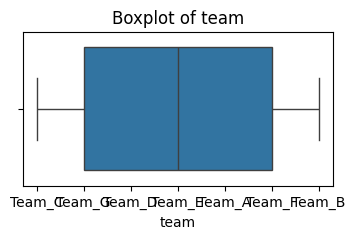

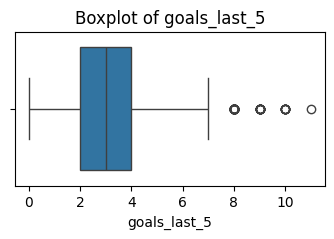

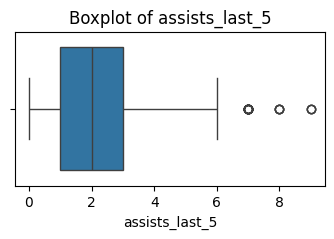

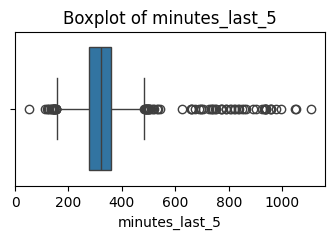

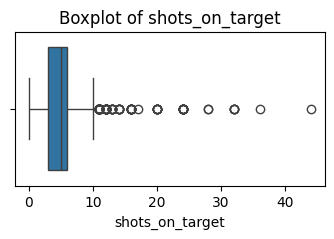

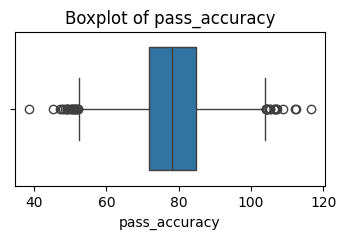

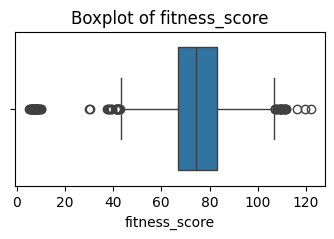

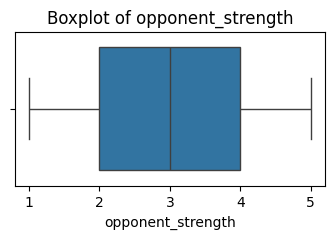

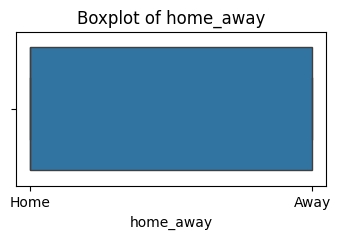

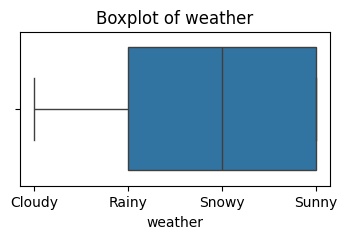

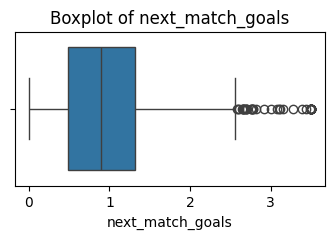

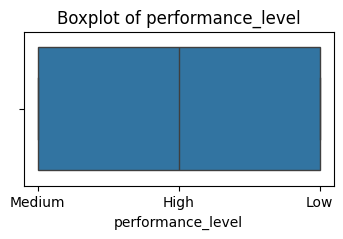

In [7]:
cols=df.columns
for col in cols:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [8]:
df.columns

Index(['player_id', 'player_position', 'team', 'goals_last_5',
       'assists_last_5', 'minutes_last_5', 'shots_on_target', 'pass_accuracy',
       'fitness_score', 'opponent_strength', 'home_away', 'weather',
       'next_match_goals', 'performance_level'],
      dtype='object')

In [9]:
df.dtypes

player_id              int64
player_position       object
team                  object
goals_last_5           int64
assists_last_5         int64
minutes_last_5       float64
shots_on_target        int64
pass_accuracy        float64
fitness_score        float64
opponent_strength      int64
home_away             object
weather               object
next_match_goals     float64
performance_level     object
dtype: object

<Axes: ylabel='minutes_last_5'>

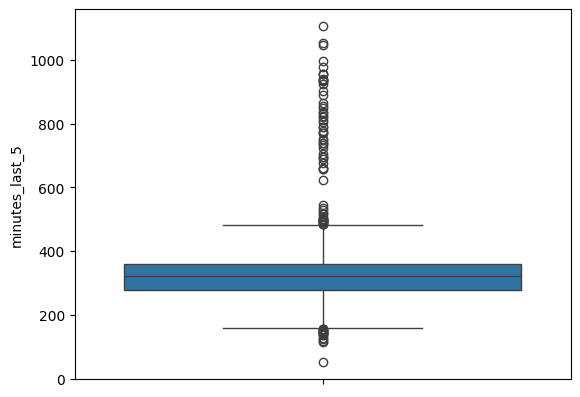

In [10]:
sns.boxplot(y='minutes_last_5',data=df)

In [11]:
Q1=np.percentile(df['minutes_last_5'],25,method='midpoint')
Q3=np.percentile(df['minutes_last_5'],75,method='midpoint')
IQR=Q3-Q1
IQR

np.float64(82.1286948341575)

In [12]:
upper=Q3+(1.5*IQR)
upper

np.float64(483.7993944661005)

In [13]:
lower=Q1-(1.5*IQR)
lower

np.float64(155.28461512947052)

In [14]:
col = "pass_accuracy"
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df[col] = df[col].clip(lower, upper)

In [15]:
# data_pass=df['minutes_last_5'].mean()
# df.loc[(df['minutes_last_5']>=upper),'minutes_last_5']=data_pass
# df.loc[(df['minutes_last_5']<=lower),'minutes_last_5']=lower

In [16]:
col = "minutes_last_5"
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df[col] = df[col].clip(lower, upper)

<Axes: ylabel='shots_on_target'>

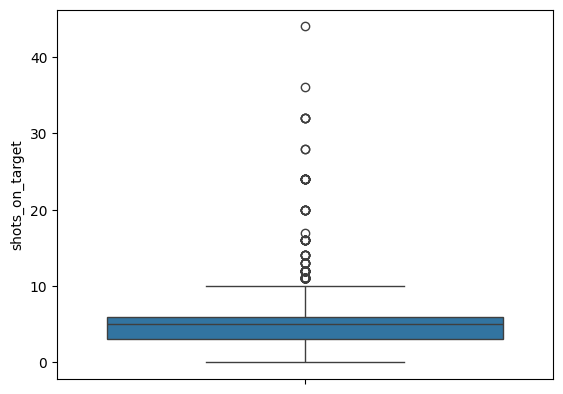

In [17]:
sns.boxplot(y='shots_on_target',data=df)

In [18]:
Q1=np.percentile(df['shots_on_target'],25,method='midpoint')
Q3=np.percentile(df['shots_on_target'],75,method='midpoint')
IQR=Q3-Q1
IQR

np.float64(3.0)

In [19]:
upper=Q3+(1.5*IQR)
upper

np.float64(10.5)

In [20]:
lower=Q1-(1.5*IQR)
lower

np.float64(-1.5)

In [21]:
# data_pass=df['shots_on_target'].mode()[0]
# data_median=df['shots_on_target'].median()
# df.loc[(df['shots_on_target']>=upper),'shots_on_target']=data_pass
# df.loc[(df['shots_on_target']<=lower),'shots_on_target']=data_median

In [22]:
col = "shots_on_target"

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df[col] = df[col].clip(lower, upper)

<Axes: ylabel='fitness_score'>

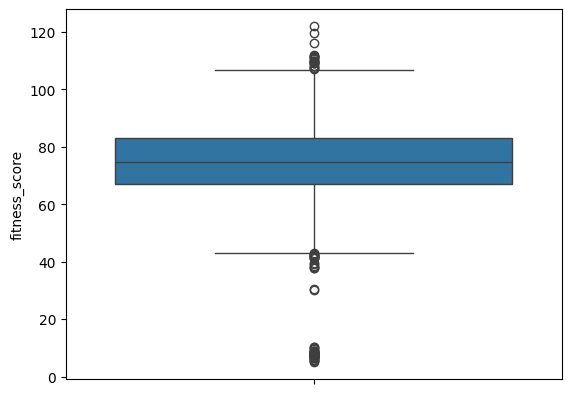

In [23]:
sns.boxplot(y=df['fitness_score'],data=df)

In [24]:
Q1=np.percentile(df['fitness_score'],25,method='midpoint')
Q3=np.percentile(df['fitness_score'],75,method='midpoint')
IQR=Q3-Q1
IQR

np.float64(15.989674830099005)

In [25]:
upper=Q3+(1.5*IQR)
upper

np.float64(106.91729263154829)

In [26]:
lower=Q1-(1.5*IQR)
lower

np.float64(42.95859331115227)

In [27]:
# data_fit=df['fitness_score'].mean()
# df.loc[(df['fitness_score']>=upper),'fitness_score']=data_fit
# df.loc[(df['fitness_score']<=lower),'fitness_score']=lower

In [28]:
col = "fitness_score"
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df[col] = df[col].clip(lower, upper)

In [29]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['home_away']=encoder.fit_transform(df['home_away'])

In [30]:
df1=pd.get_dummies(df[['player_position','weather']],drop_first=True,dtype=int)


In [31]:
x=pd.concat([df,df1],axis=1)

In [32]:
y_class=df['performance_level']

In [33]:
y_reg=df['next_match_goals']

In [34]:
x.drop(['player_id','player_position','team','weather'],axis=1,inplace=True)

In [35]:
x.drop(['performance_level','next_match_goals'],axis=1,inplace=True)

In [36]:
from sklearn.model_selection import train_test_split
x_train_reg,x_test_reg,y_train_reg,y_test_reg=train_test_split(x,y_reg,test_size=0.30,random_state=0)


In [37]:
from sklearn.model_selection import train_test_split
x_train_class,x_test_class,y_train_class,y_test_class=train_test_split(x,y_class,test_size=0.30,random_state=42)

In [38]:
x_train_class.isna().sum()

goals_last_5                  0
assists_last_5                0
minutes_last_5                0
shots_on_target               0
pass_accuracy                 0
fitness_score                 0
opponent_strength             0
home_away                     0
player_position_Forward       0
player_position_Goalkeeper    0
player_position_Midfielder    0
weather_Rainy                 0
weather_Snowy                 0
weather_Sunny                 0
dtype: int64

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=500,random_state=42)
rf_reg.fit(x_train_reg,y_train_reg)
y_pred_reg=rf_reg.predict(x_test_reg)
y_pred_reg

array([1.54017617, 1.8037983 , 0.18016237, ..., 1.01102477, 2.09352053,
       1.05417614], shape=(1500,))

In [40]:
from sklearn.metrics import r2_score
score_r2=r2_score(y_test_reg,y_pred_reg)
score_r2

0.6870544260710825

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
from sklearn.naive_bayes import MultinomialNB
naive=MultinomialNB()
from sklearn.svm import SVC
svm=SVC()
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy')
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500,random_state=0)
models=[knn,naive,svm,tree,rf]
for i in models:
    i.fit(x_train_class,y_train_class)
    y_pred_class=i.predict(x_test_class)
    score_accu=accuracy_score(y_test_class,y_pred_class)
    print(i,'\n',y_pred_class)
    print(score_accu)
    print(10*'*')

KNeighborsClassifier() 
 ['Medium' 'Low' 'Low' ... 'Low' 'Medium' 'Low']
0.5613333333333334
**********
MultinomialNB() 
 ['Low' 'Medium' 'Medium' ... 'Medium' 'Medium' 'High']
0.7
**********
SVC() 
 ['Medium' 'Medium' 'Medium' ... 'Low' 'Medium' 'Medium']
0.5406666666666666
**********
DecisionTreeClassifier(criterion='entropy') 
 ['Low' 'Medium' 'High' ... 'Low' 'Low' 'Medium']
0.6746666666666666
**********
RandomForestClassifier(n_estimators=500, random_state=0) 
 ['Low' 'Low' 'Medium' ... 'Low' 'Medium' 'Medium']
0.7626666666666667
**********


In [42]:
comparison=pd.DataFrame({'Actual Performance':y_test_reg,'Predicted Performance':y_pred_reg})
comparison.head(10)

,Actual Performance,Predicted Performance
398,1.450813,1.540176
3833,1.630074,1.803798
4836,0.000000,0.180162
4572,1.086801,1.154795
636,0.760857,0.394167
2545,1.482313,1.266021
1161,2.401839,2.263136
2230,1.825424,1.798412
148,1.702884,1.561936
2530,0.660210,0.806340


In [43]:
# from xgboost import XGBRegressor
# xgboost=XGBRegressor(n_estimators=500,random_state=42)
# xgboost.fit(x_train_reg,y_train_reg)
# y_xgb=xgboost.predict(x_test_reg)
# y_xgb

In [44]:
# score_xgb=r2_score(y_test_reg,y_xgb)
# score_xgb

In [45]:
# from sklearn.model_selection import GridSearchCV
# model1=RandomForestRegressor()
# data={'n_estimators':[100,300,600,700],'min_samples_split':[2,5,10,20],'min_samples_leaf':[1,2,4,6],'max_features':['sqrt','log2']}
# clf=GridSearchCV(model1,data,cv=5,scoring='r2')
# clf.fit(x_train_reg,y_train_reg)

In [46]:
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(y_test_reg,y_pred_reg)
error

0.26719604673448516

In [47]:
x.columns

Index(['goals_last_5', 'assists_last_5', 'minutes_last_5', 'shots_on_target',
       'pass_accuracy', 'fitness_score', 'opponent_strength', 'home_away',
       'player_position_Forward', 'player_position_Goalkeeper',
       'player_position_Midfielder', 'weather_Rainy', 'weather_Snowy',
       'weather_Sunny'],
      dtype='object')

In [48]:
import joblib
joblib.dump(rf_reg, "regression_model.joblib")
joblib.dump(rf, 'classification_model.joblib')


['classification_model.joblib']

In [49]:
joblib.dump(list(x.columns), "classification_columns.joblib")

joblib.dump(list(x.columns), "regression_columns.joblib")


['regression_columns.joblib']